In [1]:
import keras

In [2]:
# data processing X , y 
# 載入 iris data
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']      #X = iris.get('data')
y = iris['target']    #y = iris.get('target')
y[-3:]

array([2, 2, 2])

In [3]:
from keras.utils import to_categorical
y_oh = to_categorical(y)
y_oh[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [4]:
# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.2, random_state=42)

In [5]:
# 建構神經層
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential() 
model.add(Dense(units=100, activation='relu', input_shape=(4,) ) )
model.add(Dense(units=3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [6]:
# categorical_crossentropy 表示分類正確 越小越好
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=5, epochs=10, verbose=0)

In [7]:
# loss , accuracy
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 52ms/step - loss: 0.1408 - accuracy: 0.3000


[0.14079850912094116, 0.30000001192092896]

In [8]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

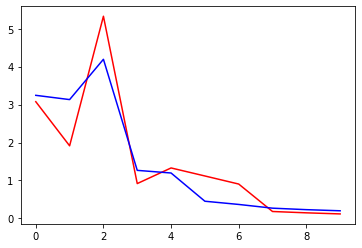

In [9]:
%matplotlib inline
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.show()

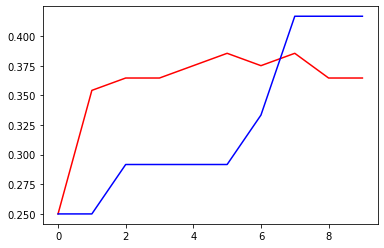

In [10]:
%matplotlib inline
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.show()

# GPU overused
InternalError: Blas GEMM launch failed : a.shape=(5, 4), b.shape=(4, 1000), m=5, n=1000, k=4
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_47, dense_1/kernel/read)]]